# Практический пример использования линейной регрессии для выявления взаимосвязи цены на нефть и стоимости рубля.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Параметры для рисования
plt.rcParams['figure.figsize'] = (16, 12)
# Шрифт надписей к графикам
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }

Загружаем данные из файлов в DF

In [3]:
# Вначале выход на 2 родительские дирректории
oil = pd.read_csv('../../data/oilPrices.csv', index_col='Date', parse_dates=True)
# print('oil=\n', oil)

In [4]:
usd_rub = pd.read_csv('../../data/usdPrices.csv', index_col='Date', parse_dates=True)
# print('usd/rub=\n', usd_rub)

Далее идет расчет линейной регресии для всего сета, назовем его "easy"

In [5]:
# Т.к. индекс нефти меньше индекса USD/RUB, будем его использовать для обоих графиков
common_index_easy = oil.index
# Реиндексируем usd_rub_price по common_index
usd_rub_easy = usd_rub.reindex(common_index_easy)

# Заполняем "NaN" предыдущими значениями
usd_rub_easy = usd_rub_easy.fillna(method='backfill')

In [6]:
Xeasy = oil['Price'].values  # По Х будут цены нефти
Yeasy = usd_rub_easy['Price'].values  # По Y будут цены usd/rub
print(Xeasy, Yeasy)

[66.1  65.77 65.96 ... 83.12 81.74 81.52] [62.8155 62.3193 62.4179 ... 30.1    30.1    30.3175]


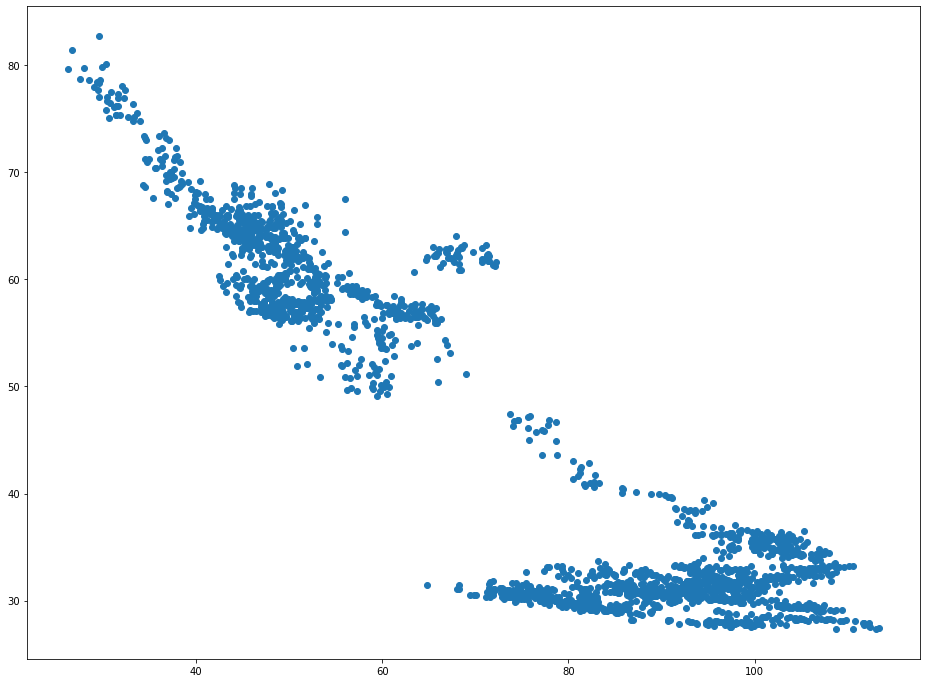

In [7]:
plt.scatter(Xeasy, Yeasy)
plt.show()

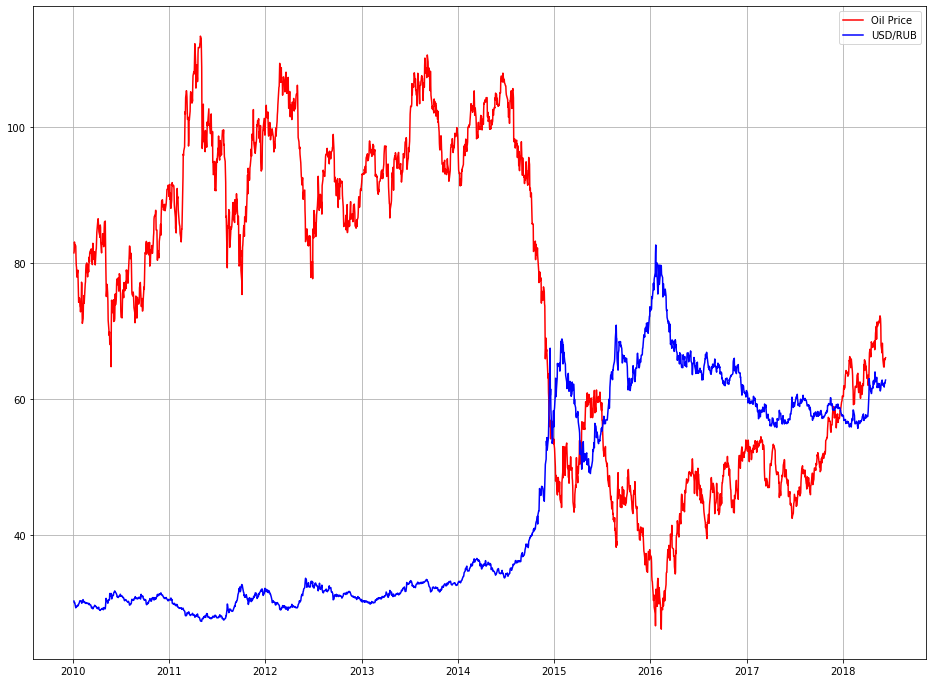

In [8]:
Xaxis_easy = common_index_easy
Yoil_easy = oil['Price'].values
Yrub_easy = usd_rub_easy['Price'].values
plt.plot(Xaxis_easy, Yoil_easy, color='red', label='Oil Price')
plt.plot(Xaxis_easy, Yrub_easy, color='blue', label='USD/RUB')
plt.legend()
plt.grid()
plt.show()

Для тренировочного сета выберем промежуток графика где стоимость нефти падала с 2014-09-01 по 2016-04-01

In [9]:
from datetime import datetime
# Выберем в данных промежуток для нефти
oil_train = oil[(oil.index > datetime(2014, 9, 1)) & (oil.index < datetime(2016, 4, 1))]
# print(f'Selected set oil: {oil_train}')

In [10]:
# Выберем в данных промежуток для usd/rub
usd_rub_train = usd_rub[(usd_rub.index > datetime(2014, 9, 1)) & (usd_rub.index < datetime(2016, 4, 1))]
# print(f'Selected set usd/rub: {usd_rub_train}')

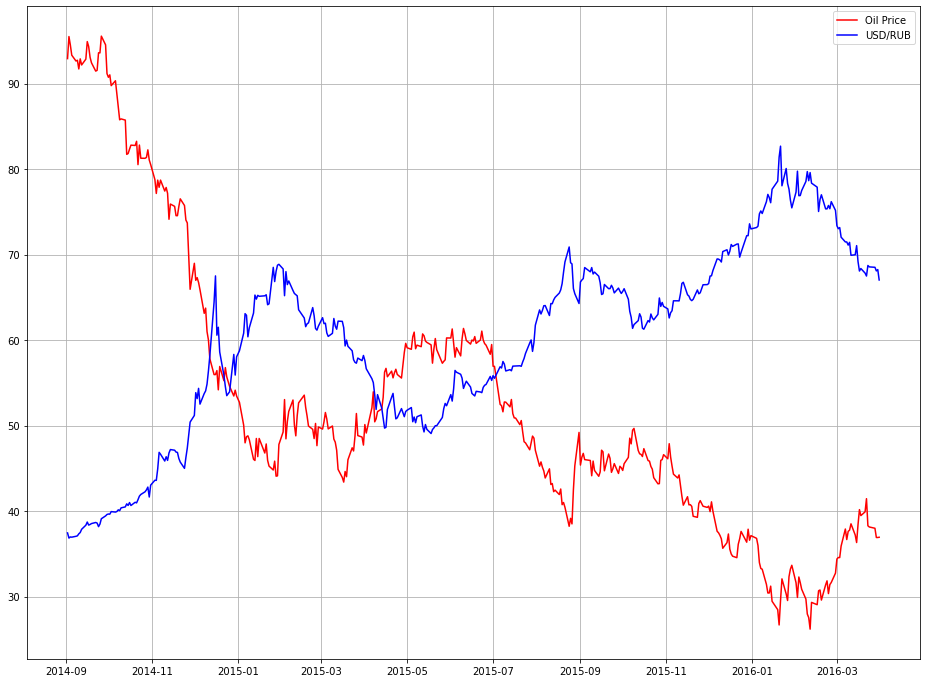

In [11]:
common_index_train = oil_train.index
# Реиндексируем usd_rub_price по common_index
usd_rub_train = usd_rub_train.reindex(common_index_train)
usd_rub_train = usd_rub_train.fillna(method='backfill')
Xaxistrain = common_index_train
Yoiltrain = oil_train['Price'].values
Yrubtrain = usd_rub_train['Price'].values
plt.plot(Xaxistrain, Yoiltrain, color='red', label='Oil Price')
plt.plot(Xaxistrain, Yrubtrain, color='blue', label='USD/RUB')
plt.legend()
plt.grid()
plt.show()

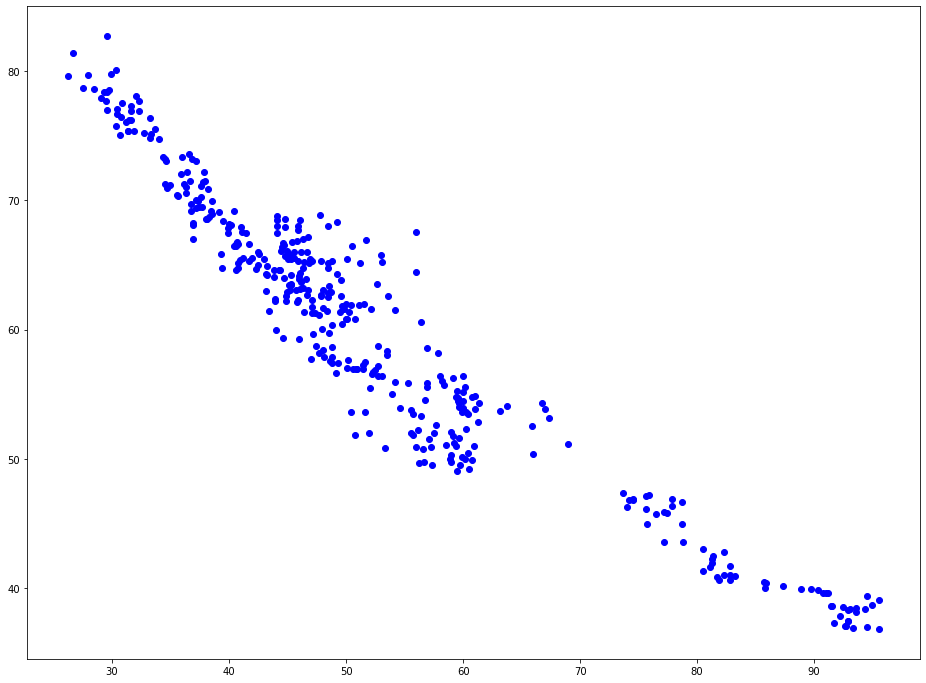

In [12]:
Xaxistrain = oil_train['Price'].values
Yrubtrain = usd_rub_train['Price'].values
plt.scatter(Xaxistrain, Yrubtrain, color='blue')
plt.show()

# Теперь строим линейную регрессию по тренинговому сету

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import r2_score

In [14]:
# Параметры для рисования
plt.rcParams['figure.figsize'] = (16, 12)
# Шрифт надписей к графикам
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }

In [15]:
oil = pd.read_csv('../../data/oilPrices.csv', index_col='Date', parse_dates=True)
usd_rub = pd.read_csv('../../data/usdPrices.csv', index_col='Date', parse_dates=True)

oil_train = oil[(oil.index > datetime(2014, 9, 1)) &
                (oil.index < datetime(2016, 4, 1))]
usd_rub_train = usd_rub[(usd_rub.index > datetime(2014, 9, 1)) & (
    usd_rub.index < datetime(2016, 4, 1))]

In [16]:
common_index_train = oil_train.index
# Реиндексируем usd_rub_price по common_index
usd_rub_train = usd_rub_train.reindex(common_index_train)
usd_rub_train = usd_rub_train.fillna(method='backfill')

In [17]:
Xtrain = oil_train['Price'].values  # По Х будут цены нефти
Ytrain = usd_rub_train['Price'].values  # По Y будут цены usd/rub

In [18]:
regr_train = linear_model.LinearRegression()
Xtrain = Xtrain.reshape(len(Xtrain), 1)
Ytrain = Ytrain.reshape(len(Ytrain), 1)

In [19]:
regr_train.fit(Xtrain, Ytrain)
Ytrainpredicted = regr_train.predict(Xtrain)

In [20]:
r2train = r2_score(Ytrain, Ytrainpredicted)
print(f'R2 связи цены рубля от нефти на тренировочном сете: {r2train}')

R2 связи цены рубля от нефти на тренировочном сете: 0.9145510416244738


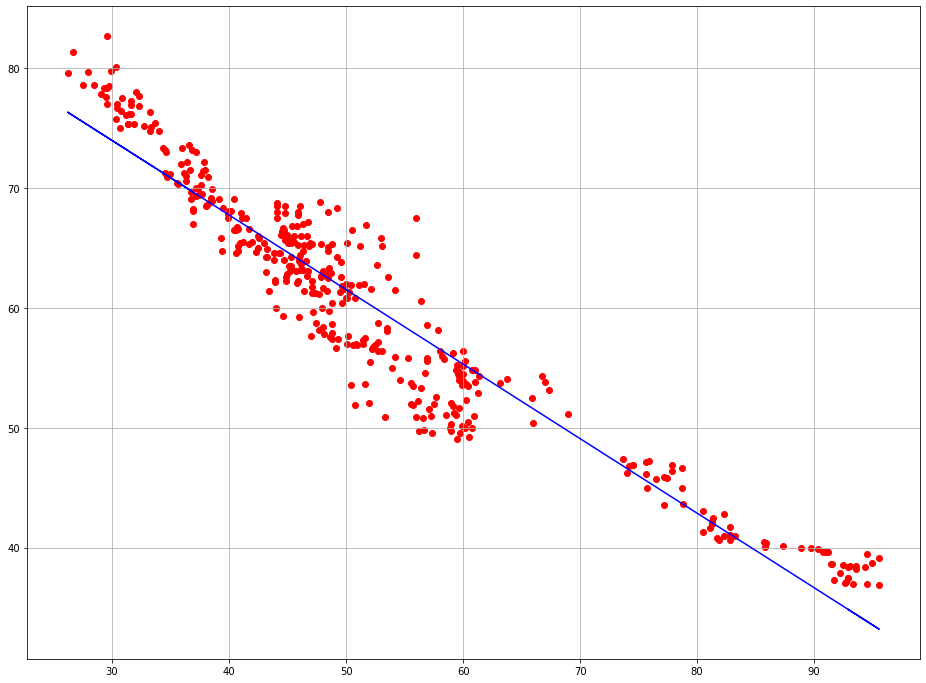

In [21]:
plt.plot(Xtrain, Ytrainpredicted, color='blue')
plt.scatter(Xtrain, Ytrain, color='red')
plt.grid()
plt.show()

**Вывод: Связь цены нефти и стоимости рубля присутствует.**
* * * 

In [22]:
print(regr_train.intercept_)
print(regr_train.coef_)

[92.63136616]
[[-0.62199947]]


# Теперь проверим полученную модель на тестовом сете

In [23]:
# Выбираем тестовый диапазон дат
oil_test = oil[(oil.index > datetime(2016, 4, 1)) & (oil.index < datetime(2018, 4, 1))]
usd_rub_test = usd_rub[(usd_rub.index > datetime(2016, 4, 1)) & (usd_rub.index < datetime(2018, 4, 1))]

common_index_test = oil_test.index
# Реиндексируем usd_rub_price по common_index
usd_rub_test = usd_rub_test.reindex(common_index_test)
usd_rub_test = usd_rub_test.fillna(method='backfill')

Xtest = oil_test['Price'].values  # По Х будут цены нефти
Ytest = usd_rub_test['Price'].values  # По Y будут цены usd/rub

regr = linear_model.LinearRegression()
Xtest = Xtest.reshape(len(Xtest), 1)
Ytest = Ytest.reshape(len(Ytest), 1)

regr.fit(Xtrain, Ytrain)
Ypredicted = regr.predict(Xtest)

r2test = r2_score(Ytest, Ypredicted)
print(f'R2 связи цены рубля от нефти на тестовом сете: {r2test}')

R2 связи цены рубля от нефти на тестовом сете: 0.127040836521345


Тестовый сет показал очень низкое значение R2

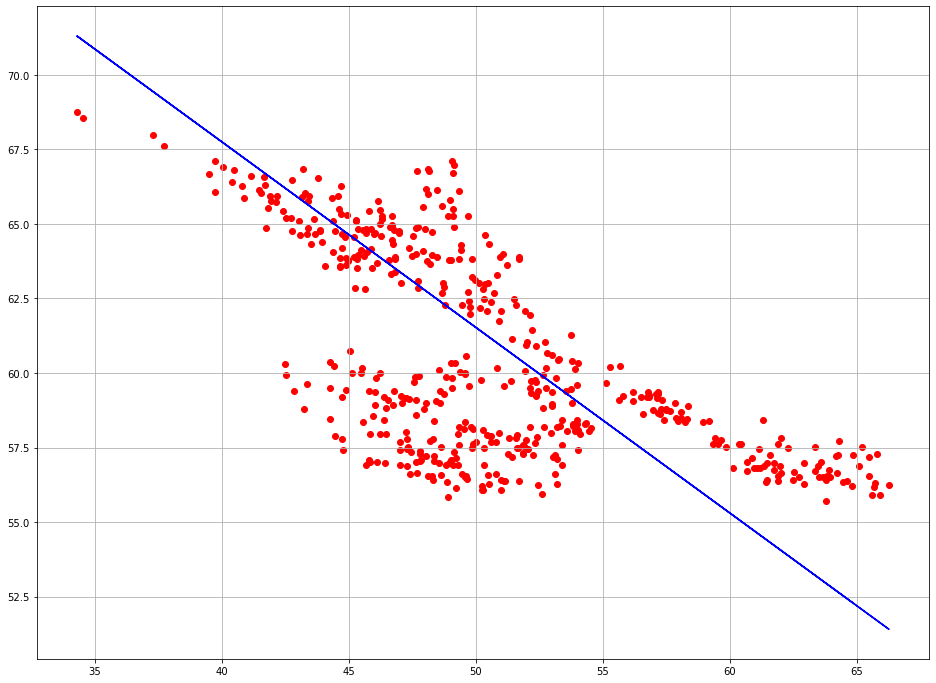

In [24]:
# Строим линейную регрессию для тестового сета
plt.plot(Xtest, Ypredicted, color='blue')
plt.scatter(Xtest, Ytest, color='red')
plt.grid()
plt.show()

In [25]:
# Разнесем предикты, для выявления среднего значения ошибки
Ytrainpredicted = regr.predict(Xtrain)
Ytestpredicted = regr.predict(Xtest)

train_errors = Ytrainpredicted - Ytrain
test_errors = Ytestpredicted - Ytest
print(f'Среднее значение ошибки для 2014-2016г.: {train_errors.mean()}')
print(f'Среднее значение ошибки для 2016-2018г.: {test_errors.mean()}')
print()
print(f'R2 связи цены рубля от нефти в 2014-2016г.: {r2train}')
print(f'R2 связи цены рубля от нефти в 2016-2018г.: {r2test}')

Среднее значение ошибки для 2014-2016г.: -4.8559704554459105e-15
Среднее значение ошибки для 2016-2018г.: 0.6657510340842464

R2 связи цены рубля от нефти в 2014-2016г.: 0.9145510416244738
R2 связи цены рубля от нефти в 2016-2018г.: 0.127040836521345
